# Privacy: the (old) New York taxis dataset

In [1]:
import pandas as pd
import seaborn as sns

Let's have a look at a huge dataset: New York Yellow Cab trips taken in January 2011. This file alone is 2.3 GB in size, so will take a moment to upload.

This [dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page) (also [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)) was originally 'open sourced' to facilitate companies and people examining traffic flows and times around NYC. 

In [2]:
nytaxis = pd.read_csv("yellow_tripdata_2011-01.csv")

C:\Users\2089319\AppData\Local\Temp\ipykernel_3440\1554322261.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  nytaxis = pd.read_csv("yellow_tripdata_2011-01.csv")


In [3]:
nytaxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464996 entries, 0 to 13464995
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   vendor_id           object 
 1   pickup_datetime     object 
 2   dropoff_datetime    object 
 3   passenger_count     int64  
 4   trip_distance       float64
 5   pickup_longitude    float64
 6   pickup_latitude     float64
 7   rate_code           int64  
 8   store_and_fwd_flag  object 
 9   dropoff_longitude   float64
 10  dropoff_latitude    float64
 11  payment_type        object 
 12  fare_amount         float64
 13  surcharge           float64
 14  mta_tax             float64
 15  tip_amount          float64
 16  tolls_amount        float64
 17  total_amount        float64
dtypes: float64(11), int64(2), object(5)
memory usage: 1.8+ GB


In [4]:
nytaxis = nytaxis[(nytaxis["dropoff_latitude"] > 40.65) &\
                 (nytaxis["dropoff_latitude"] < 40.9) &\
                 (nytaxis["dropoff_longitude"] > -74.02) &\
                 (nytaxis["dropoff_longitude"] < -73.9)]

In [5]:
nytaxis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12622890 entries, 0 to 13464995
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   vendor_id           object 
 1   pickup_datetime     object 
 2   dropoff_datetime    object 
 3   passenger_count     int64  
 4   trip_distance       float64
 5   pickup_longitude    float64
 6   pickup_latitude     float64
 7   rate_code           int64  
 8   store_and_fwd_flag  object 
 9   dropoff_longitude   float64
 10  dropoff_latitude    float64
 11  payment_type        object 
 12  fare_amount         float64
 13  surcharge           float64
 14  mta_tax             float64
 15  tip_amount          float64
 16  tolls_amount        float64
 17  total_amount        float64
dtypes: float64(11), int64(2), object(5)
memory usage: 1.8+ GB


In [6]:
# "Randomly" select a million dropoffs
nytaxis = nytaxis.sample(n = 250000)

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

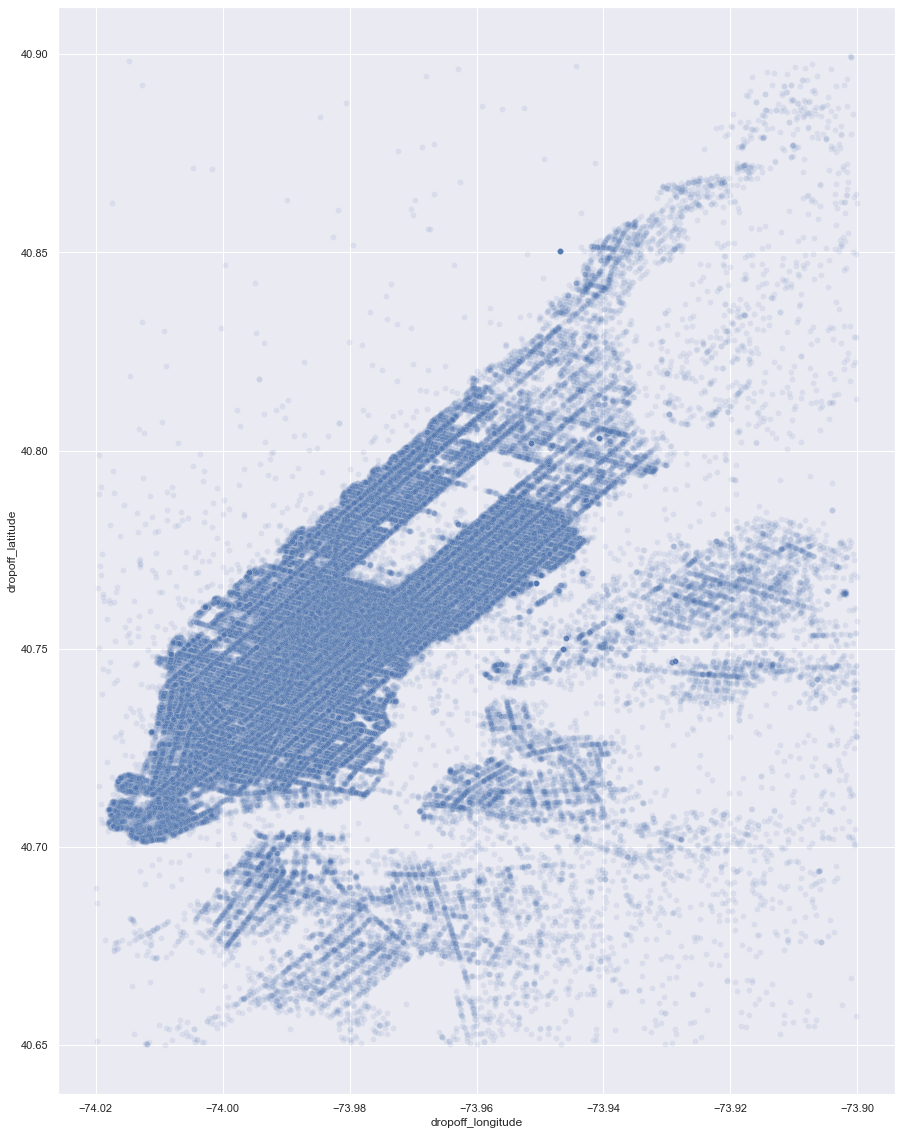

In [7]:
sns.set(rc={"figure.figsize": (15, 20)})
sns.set_style("white")

sns.scatterplot(x = "dropoff_longitude",
                y = "dropoff_latitude",
                alpha = 0.1,
                data = nytaxis)

# Let's find the Museum of Modern Art (MOMA) in Manhattan.
![](images/moma.jpg)


According to [Open StreetMap](https://www.openstreetmap.org/search?whereami=1&query=40.7613%2C-73.9778#map=19/40.76130/-73.97780), MOMA is at 40.7613 North and -73.9778 East.

In [9]:
nytaxis["MOMA"] = nytaxis.apply(lambda x: ("MOMA" if (x["dropoff_latitude"] > 40.7611) and\
                               (x["dropoff_latitude"] < 40.7615) and\
                               (x["dropoff_longitude"] < -73.977) and\
                               (x["dropoff_longitude"] > -73.978) else "Elsewhere"), axis = 1)

nytaxis.groupby("MOMA").count()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
MOMA,,,,,,,,,,,,,,,,,,
Elsewhere,249955,249955,249955,249955,249955,249955,249955,249955,125998,249955,249955,249955,249955,249955,249955,249955,249955,249955
MOMA,45,45,45,45,45,45,45,45,25,45,45,45,45,45,45,45,45,45


<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

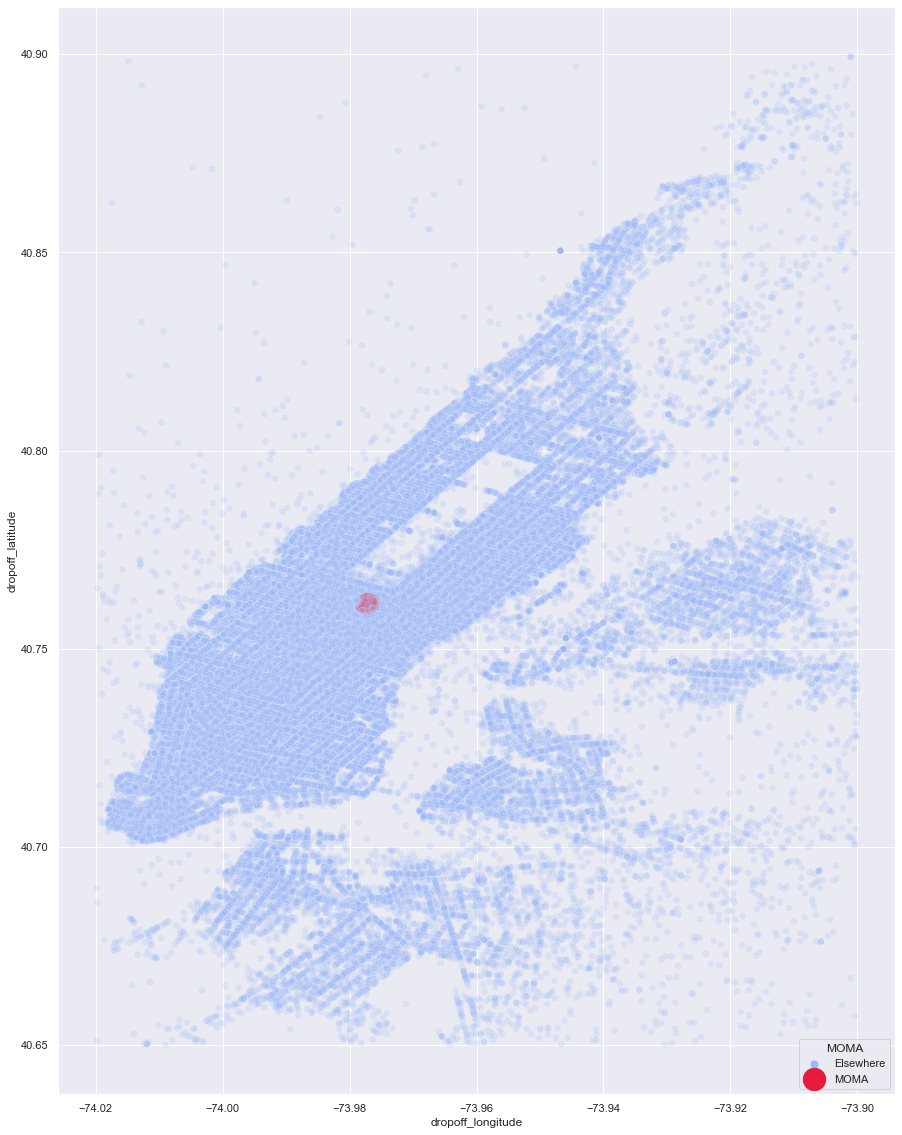

In [20]:
sns.set(rc={"figure.figsize": (15, 20)})
sns.set_style("white")
manual_palette = {"Elsewhere": "#9db8f6", 
                  "MOMA": "#e51a3d"}

          
sns.scatterplot(x = "dropoff_longitude",
                y = "dropoff_latitude",
                alpha = 0.2,
                palette = manual_palette,
                hue = "MOMA",
                size = "MOMA",
                sizes = (500,50),
                data = nytaxis)

# Where were MOMA visitors picked up?

Let's find the furthest trip north and have a look on Google Maps. Remember:

1. this is after I have excluded longer trips so we could see the map
2. And I took a relatively small sample of trips in Jan 2011: 250k out of 134 million.

In [11]:
nytaxis[nytaxis["MOMA"] == "MOMA"].sort_values("pickup_latitude", ascending = False).head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,MOMA
9842983,VTS,2011-01-12 07:54:00,2011-01-12 08:08:00,1,2.38,-73.955260,40.788657,1,NaN,-73.977365,40.761357,CSH,9.3,0.0,0.5,0.0,0.0,9.8,MOMA
181804,VTS,2011-01-05 14:20:00,2011-01-05 14:40:00,1,1.96,-73.958445,40.784225,1,NaN,-73.977520,40.761333,CSH,11.3,0.0,0.5,0.0,0.0,11.8,MOMA
5989596,CMT,2011-01-31 12:06:27,2011-01-31 12:14:30,1,1.60,-73.961748,40.779776,1,N,-73.977916,40.761240,CSH,6.5,0.0,0.5,0.0,0.0,7.0,MOMA
12588824,CMT,2011-01-08 14:06:12,2011-01-08 14:11:29,2,1.60,-73.962028,40.779439,1,N,-73.977263,40.761139,CSH,6.1,0.0,0.5,0.0,0.0,6.6,MOMA
2140421,CMT,2011-01-11 07:33:42,2011-01-11 07:46:55,1,3.00,-73.944650,40.779265,1,N,-73.977844,40.761195,CSH,10.5,0.0,0.5,0.0,0.0,11.0,MOMA


In [13]:
nytaxis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 1177794 to 7960112
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   vendor_id           250000 non-null  object 
 1   pickup_datetime     250000 non-null  object 
 2   dropoff_datetime    250000 non-null  object 
 3   passenger_count     250000 non-null  int64  
 4   trip_distance       250000 non-null  float64
 5   pickup_longitude    250000 non-null  float64
 6   pickup_latitude     250000 non-null  float64
 7   rate_code           250000 non-null  int64  
 8   store_and_fwd_flag  126023 non-null  object 
 9   dropoff_longitude   250000 non-null  float64
 10  dropoff_latitude    250000 non-null  float64
 11  payment_type        250000 non-null  object 
 12  fare_amount         250000 non-null  float64
 13  surcharge           250000 non-null  float64
 14  mta_tax             250000 non-null  float64
 15  tip_amount          250000 

In [14]:
taxis2 = nytaxis[(nytaxis["pickup_latitude"] > 40.65) &\
                 (nytaxis["pickup_latitude"] < 40.9) &\
                 (nytaxis["pickup_longitude"] > -74.02) &\
                 (nytaxis["pickup_longitude"] < -73.9)]

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

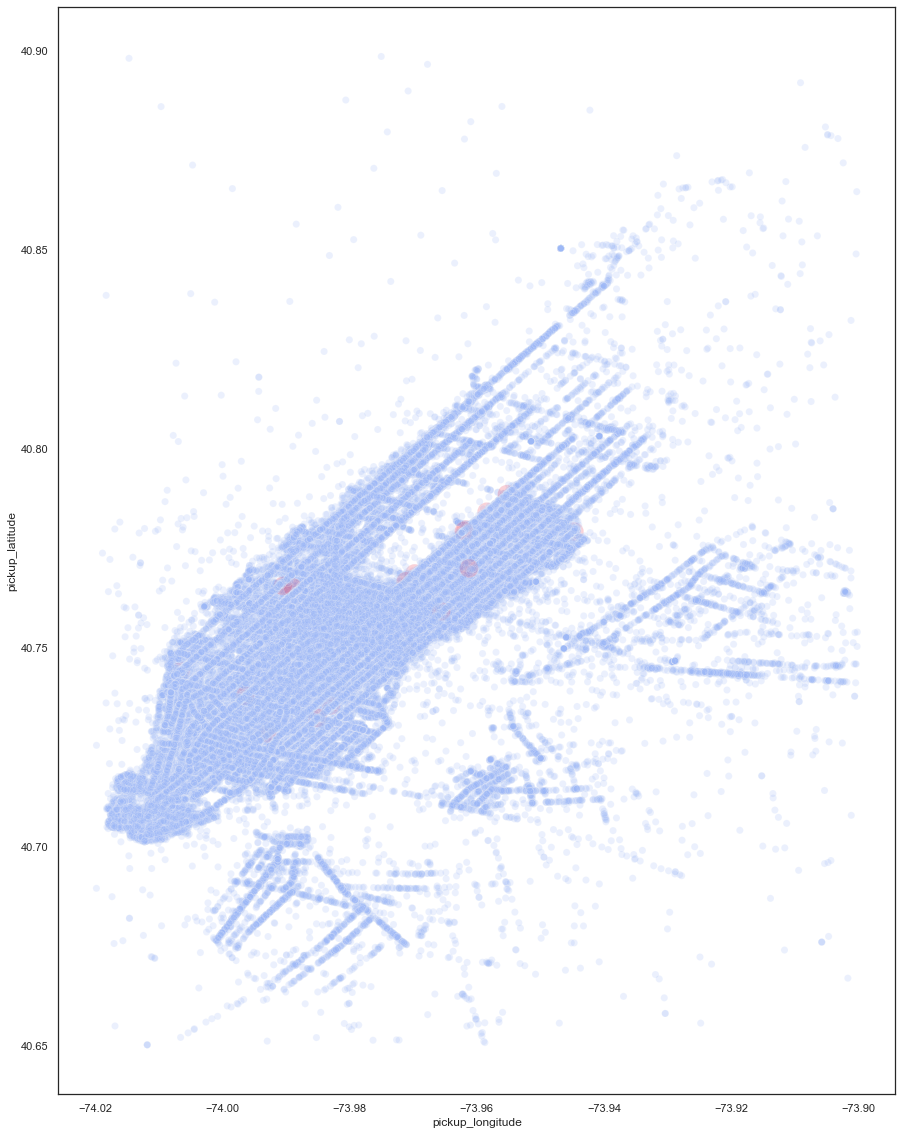

In [25]:
sns.set(rc={"figure.figsize": (15, 20)})
sns.set_style("white")

manual_palette = {"Elsewhere": "#9db8f6", 
                  "MOMA": "#e41e40"}

sns.scatterplot(x = "pickup_longitude",
                y = "pickup_latitude",
                alpha = 0.2,
                palette = manual_palette,
                hue = taxis2["MOMA"],
                size = taxis2["MOMA"],
                sizes = (350,50),
                legend = False,
                data = nytaxis)

# What do you think we could do with this data if we were so inclined?